In [1]:
# Plot the graphs in this notebook
%matplotlib inline

In [18]:
from random import randint, seed, choice
from enum import Enum

In [3]:
import matplotlib.pyplot as plt

In [4]:
# This class describe the strategy of the player. Wether they keep or change their choice.
class Strategy(Enum):
    CHANGE = 1
    KEEP = 2

In [5]:
# Initialize the random numbers generator
seed()

In [6]:
def play_game(strategy):
    """
    Simulates a Monty Hall game.
    This function simulates:
        - The first choice of the player,
        - The elimination of a wrong choice,
        - The second choice of the player.
    
    :param strategy: Keep or change
    :return:
        - True if the player wins the game,
        - False otherwise.
    """
    
    
    doors = [0, 1, 2] # All doors
    good_choice = randint(0, 2) # The door with the prize
    first_choice = randint(0, 2) # The first choice of the player
    
    # remove 2 doors; The player's choice and another door.
    doors.remove(first_choice)
    if first_choice == good_choice:
        doors.remove(doors[randint(0, 1)])
    else:
        doors = [good_choice]
    
    # Select the second choice depending on the player's strategy
    second_choice = 0
    if strategy == Strategy.CHANGE:
        second_choice = doors[0]
    elif strategy == Strategy.KEEP:
        second_choice = first_choice
    else:
        raise ValueError("Unkown strategy!")
        
    return second_choice == good_choice    

In [7]:
play_game(Strategy.KEEP)

False

In [8]:
play_game(Strategy.CHANGE)

True

In [9]:
def play(strategy, num_rounds):
    '''
    Simulates a series of rounds of the Monty Hall game..
    
    :param strategy: Keep or change.
    :param num_rounds: numbers of rounds to play.
        
    Returns:
        list: A list of 1s and 0s representing the results of the rounds (1: win, 0: loss).
    '''
    
    return [1 if play_game(strategy) else 0 for i in range(num_rounds)]

In [10]:
print(f"By changing his choice, the player won the game {sum(play(Strategy.CHANGE, 1000))} out of 1000 times.")

By changing his choice, the player won the game 635 out of 1000 times.


In [11]:
print(f"By keeping her choice, the player won the game {sum(play(Strategy.KEEP, 1000))} out of 1000 times.")

By keeping her choice, the player won the game 315 out of 1000 times.


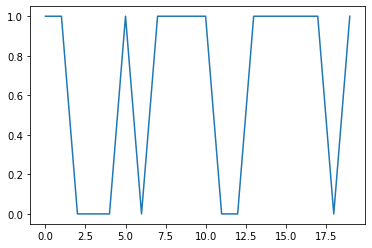

In [12]:
# Plot the times the player wins when the player chooses to change his choice
plot = plt.plot(play(Strategy.CHANGE, 20))

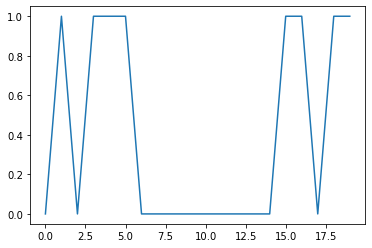

In [13]:
# Plot the times the player wins when the player chooses to keep her choice
plot = plt.plot(play(Strategy.KEEP, 20))

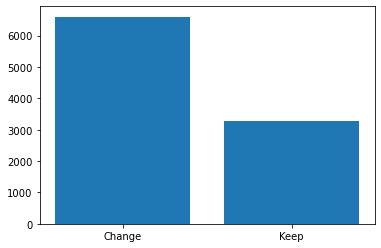

In [14]:
# Bar plot
plot = plt.bar([1,2],
               [
                   sum(play(Strategy.CHANGE, 10000)),
                   sum(play(Strategy.KEEP, 10000))
               ], 
               tick_label=["Change","Keep"])

# Linear relation:
* The following plot checks if there is a relation between the number of rounds and the the number of wins.


In [27]:
gains_change = []
gains_keep = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for rounds in samples:
    gains_change.append(play(Strategy.CHANGE, rounds))
    gains_keep.append(play(Strategy.KEEP, rounds))

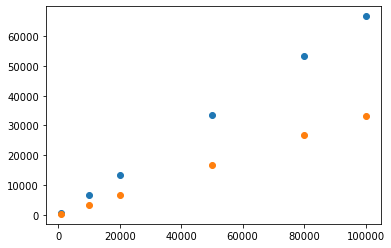

In [28]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in gains_change])
plot = plt.scatter(samples, [sum(x) for x in gains_keep])

## Randomly choosing a strategy

In [29]:
def play_randomly(num_rounds):
    '''
    Simulates a series of rounds of the Monty Hall game. 
    At each round the player chooses randomly weather to keep or change her decision.
    
    :param strategy: Keep or change.
    :param num_rounds: numbers of rounds to play.
        
    Returns:
        list: A list of 1s and 0s representing the results of the rounds (1: win, 0: loss).
    '''
    
    return [1 if play_game(choice(list(Strategy))) else 0 for i in range(num_rounds)]

In [30]:
gains_random = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for rounds in samples:
    gains_random.append(play_randomly(rounds))

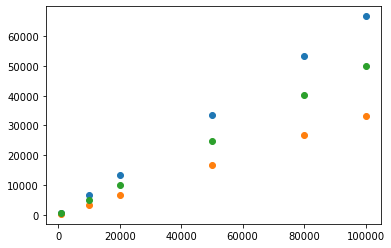

In [31]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in gains_change])
plot = plt.scatter(samples, [sum(x) for x in gains_keep])
plot = plt.scatter(samples, [sum(x) for x in gains_random])